<b>Solution justification</b>

To perform the task we have applied the two-pointer algorithm and implemented two functions: <i>merge()</i> and <i>find_percentile()</i>.

The time complexity of the <i>merge()</i> function is <i>O(n+m)</i>, where <i>n</i> is the length of array <i>a</i> and <i>m</i> is the length of array <i>b</i>. The function iterates through both arrays, comparing and appending the elements until both arrays have been fully traversed.

The time complexity of <i>find_percentile()</i> is <i>O(1)</i> for finding the index of the <i>k</i>-th percentile as it involves only simple arithmetic calculations. The time complexity of returning the <i>k</i>-th element from the sorted merged array is <i>O(1)</i> since it involves a single indexing operation.

Therefore, the overall time complexity of the solution is <i>O(n+m)</i>. 

---
<br>Below is a code snippet for running random tests of increasing size and plotting the working time chart, which proves linear time complexity.</u>

---
The space complexity of the <i>merge()</i> function is <i>O(n+m)</i> as it creates a new list of length n+m to store the merged array. The space complexity of the <i>find_percentile()</i> function is <i>O(1)</i> as it only uses a few variables to store the intermediate results.

Therefore, the overall space complexity of the solution is <i>O(n+m)</i>.

If the input consisted of unsorted array(s) instead of sorted ones we would consider applying the merge sort algorithm, which has a time complexity of <i>O(n*log(n))</i> and space complexity on arrays of <i>O(n)</i>, where n is the total length of the input. https://www.cprogramming.com/tutorial/computersciencetheory/sortcomp.html

100%
CPU times: total: 2min 26s
Wall time: 2min 28s


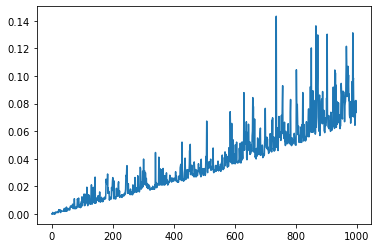

In [28]:
%%time

import matplotlib.pyplot as plt
from time import time
from random import randint
from IPython.display import clear_output as clear

def merge(a: list, b: list) -> list:
    c = []
    i = j = 0
    while i < len(a) and j < len(b):
        if a[i] < b[j]:
            c.append(a[i])
            i += 1
        else:
            c.append(b[j])
            j += 1
    c.extend(a[i:])
    c.extend(b[j:])
    return c


def find_percentile(a: list, b: list, p: int) -> int:
    c = merge(a, b)
    k = int(-(-p*len(c) // 100)) - 1
    return c[k]


def get_random_test(test_size: int, right_border: int) -> list:
    test = []
    for i in range(test_size):
        test.append(randint(0, right_border))
    test.sort()
    return test


def run_and_plot(start=1, end=1000, bunch=100):
    timings, progress_prev = [], 0
    for i in range(start, end):
        a = get_random_test(bunch*i, 100000000)
        b = get_random_test(bunch*i, 100000000)
        p = randint(1, 100)
        start_time = time()
        find_percentile(a, b, p)
        end_time = time()
        timings.append(end_time - start_time)
        progress = round(i/(3*end-2*i)*100)
        if progress > progress_prev:
            clear()
            print(f'{progress}%')
            progress_prev = progress
    plt.plot(timings)


def main():
    run_and_plot()


if __name__ == "__main__":
    main()
